# Multi-N Analysis - Optimal Portfolio Size

This notebook analyzes the results from testing different portfolio sizes (N satellites) with the multi-horizon consensus strategy.

**Goal**: Find the optimal N that balances alpha generation with consistency (hit rate).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use('dark_background')
sns.set_palette("husl")

# Load results
results_file = Path('../data/multi_horizon_consensus/multi_n_comparison.csv')
df = pd.read_csv(results_file)

# Convert alpha to percentage
df['avg_alpha_pct'] = df['avg_alpha'] * 100
df['std_alpha_pct'] = df['std_alpha'] * 100
df['annual_alpha_pct'] = df['avg_alpha'] * 12 * 100  # Annualized (simple)

print(f"Loaded {len(df)} results")
print(f"\nN values tested: {sorted(df['n_satellites'].unique())}")
print(f"Methods tested: {df['method'].unique().tolist()}")

df.head()

Loaded 30 results

N values tested: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Methods tested: ['primary_only', 'unanimous', 'weighted_avg', 'primary_veto', 'majority']


,method,n_selections,n_periods,avg_alpha,std_alpha,sharpe,hit_rate,portfolio_hit_rate,date_alphas,n_satellites,avg_alpha_pct,std_alpha_pct,annual_alpha_pct
0,primary_only,108,108,0.034865,0.047139,0.739636,0.842593,0.842593,date\n2015-01-31 0.037482\n2015-02-28 0....,1,3.486540,4.713862,41.838479
1,unanimous,108,108,0.034865,0.047139,0.739636,0.842593,0.842593,date\n2015-01-31 0.037482\n2015-02-28 0....,1,3.486540,4.713862,41.838479
2,weighted_avg,108,108,0.027138,0.047660,0.569408,0.703704,0.703704,date\n2015-01-31 -0.018374\n2015-02-28 0....,1,2.713803,4.766008,32.565638
3,primary_veto,108,108,0.024815,0.049364,0.502706,0.740741,0.740741,date\n2015-01-31 0.037482\n2015-02-28 0....,1,2.481538,4.936363,29.778457
4,majority,108,108,0.024883,0.058821,0.423031,0.666667,0.666667,date\n2015-01-31 0.013082\n2015-02-28 -0....,1,2.488296,5.882059,29.859557


## 1. Best Method per N

Find the best consensus method for each portfolio size.

In [2]:
# Find best method per N (by Sharpe ratio)
best_per_n = df.loc[df.groupby('n_satellites')['sharpe'].idxmax()]

print("Best Method per N (by Sharpe Ratio):")
print("="*80)
for _, row in best_per_n.iterrows():
    print(f"\nN={int(row['n_satellites'])}:")
    print(f"  Method: {row['method']}")
    print(f"  Monthly Alpha: {row['avg_alpha_pct']:.2f}% ± {row['std_alpha_pct']:.2f}%")
    print(f"  Annual Alpha: {row['annual_alpha_pct']:.1f}%")
    print(f"  Portfolio Hit Rate: {row['portfolio_hit_rate']:.2%}")
    print(f"  Sharpe Ratio: {row['sharpe']:.3f}")

Best Method per N (by Sharpe Ratio):

N=1:
  Method: primary_only
  Monthly Alpha: 3.49% ± 4.71%
  Annual Alpha: 41.8%
  Portfolio Hit Rate: 84.26%
  Sharpe Ratio: 0.740

N=2:
  Method: primary_only
  Monthly Alpha: 3.35% ± 5.45%
  Annual Alpha: 40.1%
  Portfolio Hit Rate: 87.04%
  Sharpe Ratio: 0.614

N=3:
  Method: primary_only
  Monthly Alpha: 3.06% ± 4.92%
  Annual Alpha: 36.7%
  Portfolio Hit Rate: 92.59%
  Sharpe Ratio: 0.621

N=4:
  Method: unanimous
  Monthly Alpha: 3.05% ± 5.10%
  Annual Alpha: 36.5%
  Portfolio Hit Rate: 95.37%
  Sharpe Ratio: 0.597

N=5:
  Method: primary_veto
  Monthly Alpha: 2.40% ± 4.07%
  Annual Alpha: 28.8%
  Portfolio Hit Rate: 88.89%
  Sharpe Ratio: 0.590

N=6:
  Method: unanimous
  Monthly Alpha: 2.96% ± 5.26%
  Annual Alpha: 35.5%
  Portfolio Hit Rate: 91.67%
  Sharpe Ratio: 0.563


## 2. N vs Performance Metrics

Visualize how portfolio size affects different performance metrics.

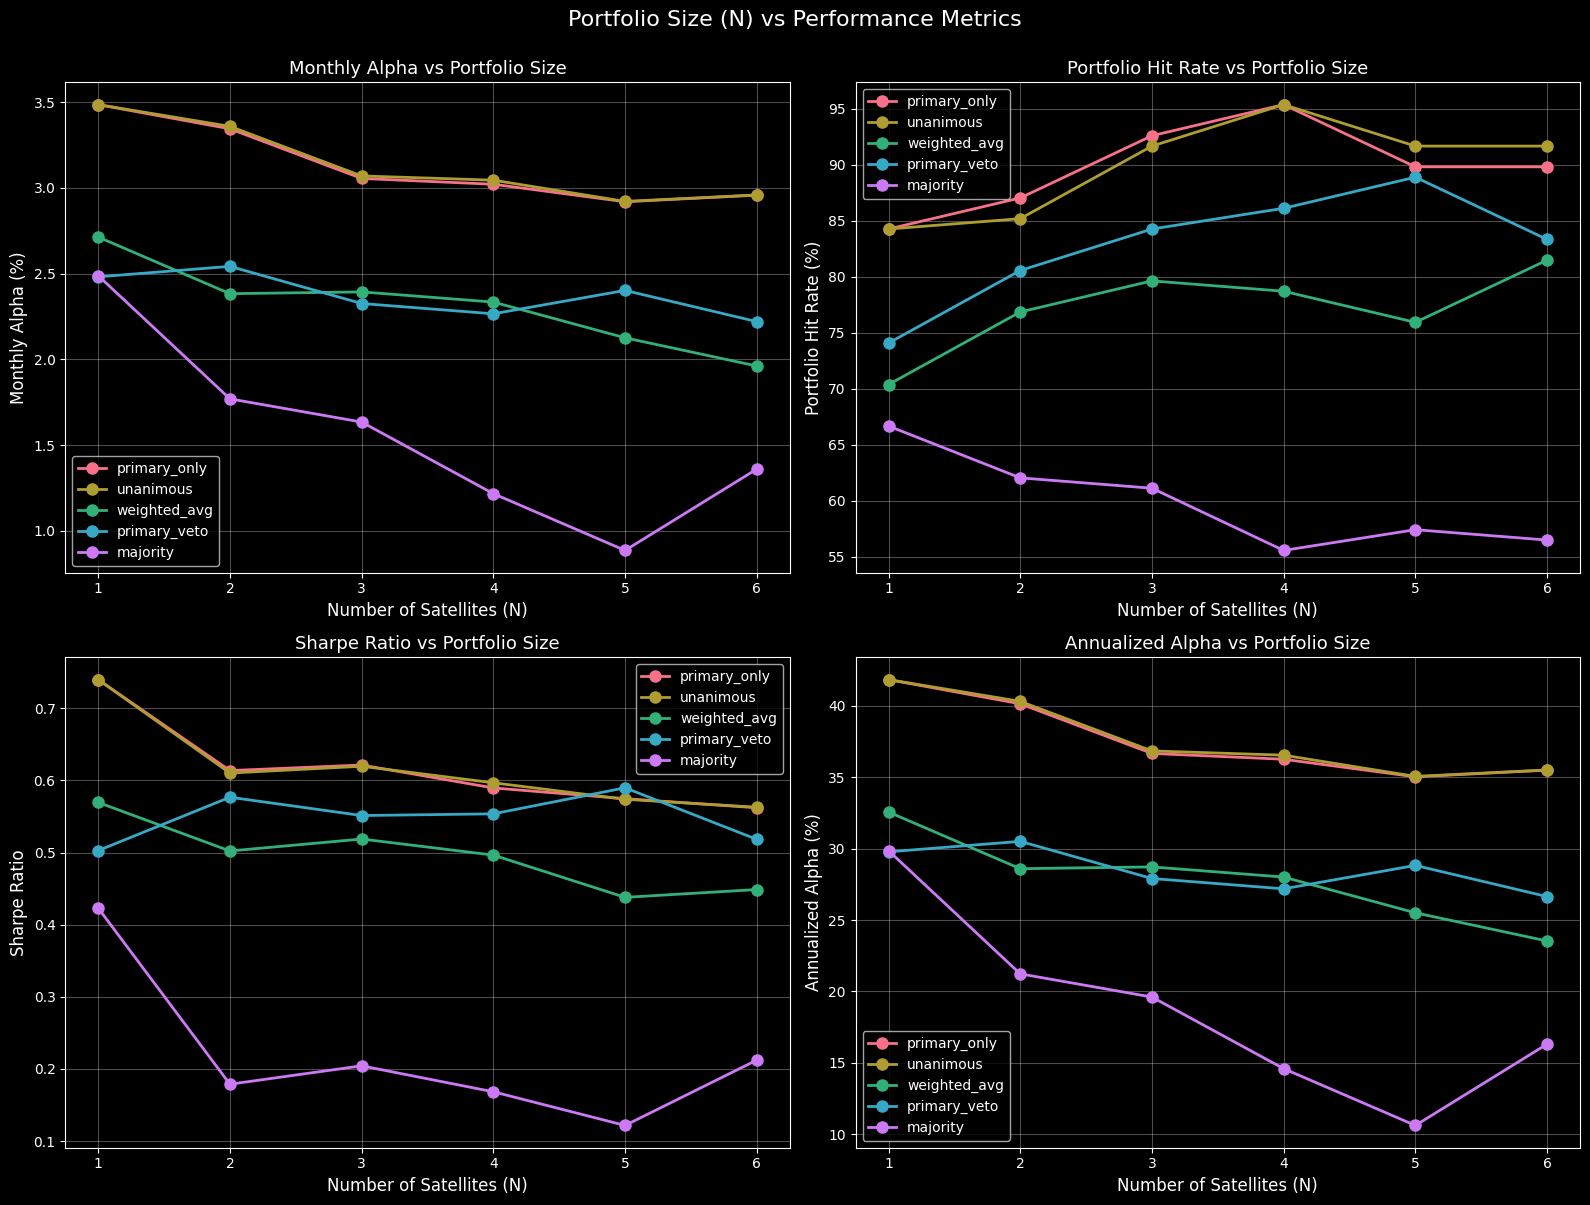

In [3]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Portfolio Size (N) vs Performance Metrics', fontsize=16, y=1.00)

# Plot each consensus method
methods = df['method'].unique()
colors = sns.color_palette("husl", len(methods))

# 1. Monthly Alpha vs N
ax = axes[0, 0]
for method, color in zip(methods, colors):
    method_df = df[df['method'] == method]
    ax.plot(method_df['n_satellites'], method_df['avg_alpha_pct'], 
            marker='o', label=method, color=color, linewidth=2, markersize=8)
ax.set_xlabel('Number of Satellites (N)', fontsize=12)
ax.set_ylabel('Monthly Alpha (%)', fontsize=12)
ax.set_title('Monthly Alpha vs Portfolio Size', fontsize=13)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['n_satellites'].unique()))

# 2. Portfolio Hit Rate vs N
ax = axes[0, 1]
for method, color in zip(methods, colors):
    method_df = df[df['method'] == method]
    ax.plot(method_df['n_satellites'], method_df['portfolio_hit_rate'] * 100, 
            marker='o', label=method, color=color, linewidth=2, markersize=8)
ax.set_xlabel('Number of Satellites (N)', fontsize=12)
ax.set_ylabel('Portfolio Hit Rate (%)', fontsize=12)
ax.set_title('Portfolio Hit Rate vs Portfolio Size', fontsize=13)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['n_satellites'].unique()))

# 3. Sharpe Ratio vs N
ax = axes[1, 0]
for method, color in zip(methods, colors):
    method_df = df[df['method'] == method]
    ax.plot(method_df['n_satellites'], method_df['sharpe'], 
            marker='o', label=method, color=color, linewidth=2, markersize=8)
ax.set_xlabel('Number of Satellites (N)', fontsize=12)
ax.set_ylabel('Sharpe Ratio', fontsize=12)
ax.set_title('Sharpe Ratio vs Portfolio Size', fontsize=13)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['n_satellites'].unique()))

# 4. Annual Alpha vs N
ax = axes[1, 1]
for method, color in zip(methods, colors):
    method_df = df[df['method'] == method]
    ax.plot(method_df['n_satellites'], method_df['annual_alpha_pct'], 
            marker='o', label=method, color=color, linewidth=2, markersize=8)
ax.set_xlabel('Number of Satellites (N)', fontsize=12)
ax.set_ylabel('Annualized Alpha (%)', fontsize=12)
ax.set_title('Annualized Alpha vs Portfolio Size', fontsize=13)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['n_satellites'].unique()))

plt.tight_layout()
plt.show()

## 3. Best Performance (Highest Sharpe)

Focus on the best-performing configurations.

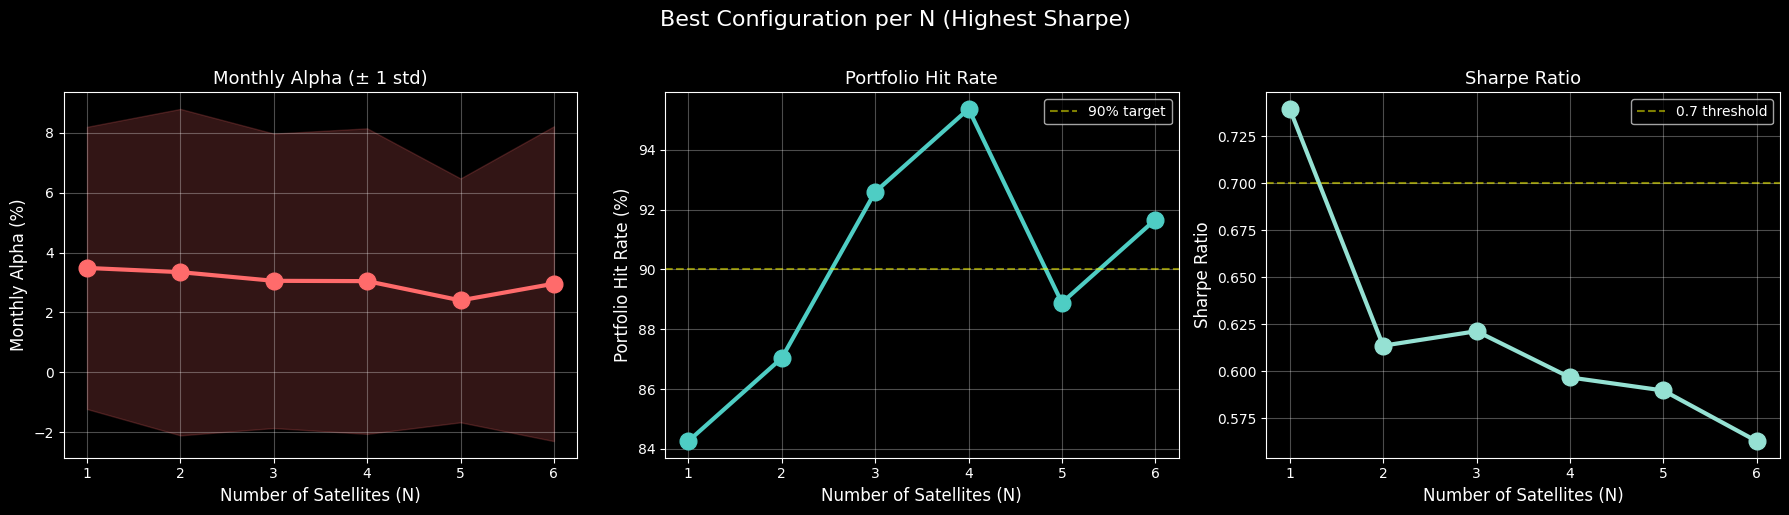

In [4]:
# Plot only the best method per N
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Best Configuration per N (Highest Sharpe)', fontsize=16, y=1.02)

# Alpha
ax = axes[0]
ax.plot(best_per_n['n_satellites'], best_per_n['avg_alpha_pct'], 
        marker='o', color='#FF6B6B', linewidth=3, markersize=12)
ax.fill_between(best_per_n['n_satellites'], 
                best_per_n['avg_alpha_pct'] - best_per_n['std_alpha_pct'],
                best_per_n['avg_alpha_pct'] + best_per_n['std_alpha_pct'],
                alpha=0.2, color='#FF6B6B')
ax.set_xlabel('Number of Satellites (N)', fontsize=12)
ax.set_ylabel('Monthly Alpha (%)', fontsize=12)
ax.set_title('Monthly Alpha (± 1 std)', fontsize=13)
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['n_satellites'].unique()))

# Hit Rate
ax = axes[1]
ax.plot(best_per_n['n_satellites'], best_per_n['portfolio_hit_rate'] * 100, 
        marker='o', color='#4ECDC4', linewidth=3, markersize=12)
ax.set_xlabel('Number of Satellites (N)', fontsize=12)
ax.set_ylabel('Portfolio Hit Rate (%)', fontsize=12)
ax.set_title('Portfolio Hit Rate', fontsize=13)
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['n_satellites'].unique()))
ax.axhline(y=90, color='yellow', linestyle='--', alpha=0.5, label='90% target')
ax.legend()

# Sharpe
ax = axes[2]
ax.plot(best_per_n['n_satellites'], best_per_n['sharpe'], 
        marker='o', color='#95E1D3', linewidth=3, markersize=12)
ax.set_xlabel('Number of Satellites (N)', fontsize=12)
ax.set_ylabel('Sharpe Ratio', fontsize=12)
ax.set_title('Sharpe Ratio', fontsize=13)
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df['n_satellites'].unique()))
ax.axhline(y=0.7, color='yellow', linestyle='--', alpha=0.5, label='0.7 threshold')
ax.legend()

plt.tight_layout()
plt.show()

## 4. Risk-Return Trade-off

Visualize the efficient frontier across different N values.

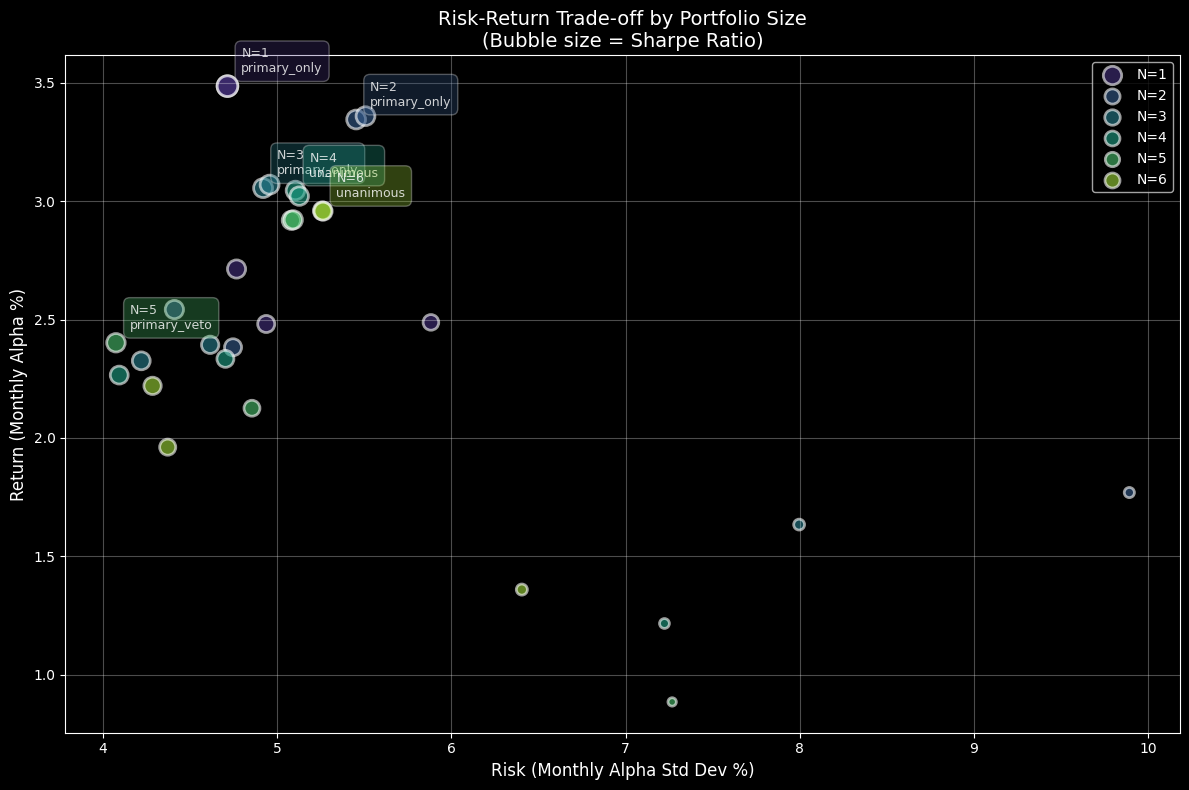

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each N with different colors
n_values = sorted(df['n_satellites'].unique())
colors_n = sns.color_palette("viridis", len(n_values))

for n, color in zip(n_values, colors_n):
    n_df = df[df['n_satellites'] == n]
    
    # Plot each method for this N
    ax.scatter(n_df['std_alpha_pct'], n_df['avg_alpha_pct'], 
              s=n_df['sharpe']*300, alpha=0.6, color=color, 
              label=f'N={int(n)}', edgecolors='white', linewidth=2)
    
    # Annotate best method for this N
    best_idx = n_df['sharpe'].idxmax()
    best = n_df.loc[best_idx]
    ax.annotate(f"N={int(n)}\n{best['method']}", 
               xy=(best['std_alpha_pct'], best['avg_alpha_pct']),
               xytext=(10, 10), textcoords='offset points',
               fontsize=9, alpha=0.8,
               bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.3))

ax.set_xlabel('Risk (Monthly Alpha Std Dev %)', fontsize=12)
ax.set_ylabel('Return (Monthly Alpha %)', fontsize=12)
ax.set_title('Risk-Return Trade-off by Portfolio Size\n(Bubble size = Sharpe Ratio)', fontsize=14)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Summary Table

Best configuration for each N value.

In [6]:
# Create summary table
summary = best_per_n[['n_satellites', 'method', 'avg_alpha_pct', 'annual_alpha_pct', 
                       'portfolio_hit_rate', 'sharpe', 'n_periods']].copy()
summary.columns = ['N', 'Best Method', 'Monthly Alpha (%)', 'Annual Alpha (%)', 
                   'Portfolio Hit Rate', 'Sharpe', 'Periods']
summary['Portfolio Hit Rate'] = summary['Portfolio Hit Rate'].apply(lambda x: f"{x:.2%}")
summary['Monthly Alpha (%)'] = summary['Monthly Alpha (%)'].apply(lambda x: f"{x:.2f}")
summary['Annual Alpha (%)'] = summary['Annual Alpha (%)'].apply(lambda x: f"{x:.1f}")
summary['Sharpe'] = summary['Sharpe'].apply(lambda x: f"{x:.3f}")
summary['N'] = summary['N'].astype(int)

print("\nSUMMARY: Best Configuration per N")
print("="*100)
display(summary.reset_index(drop=True))


SUMMARY: Best Configuration per N


,N,Best Method,Monthly Alpha (%),Annual Alpha (%),Portfolio Hit Rate,Sharpe,Periods
0,1,primary_only,3.49,41.8,84.26%,0.740,108
1,2,primary_only,3.35,40.1,87.04%,0.614,108
2,3,primary_only,3.06,36.7,92.59%,0.621,108
3,4,unanimous,3.05,36.5,95.37%,0.597,108
4,5,primary_veto,2.40,28.8,88.89%,0.590,108
5,6,unanimous,2.96,35.5,91.67%,0.563,108


## 6. Overall Winner

Find the overall optimal configuration.

In [7]:
# Best overall by different criteria
print("\n" + "="*80)
print("OVERALL WINNERS")
print("="*80)

best_alpha = df.loc[df['avg_alpha'].idxmax()]
print(f"\n🏆 Highest Alpha:")
print(f"   N={int(best_alpha['n_satellites'])}, Method={best_alpha['method']}")
print(f"   Monthly: {best_alpha['avg_alpha_pct']:.2f}%, Annual: {best_alpha['annual_alpha_pct']:.1f}%")
print(f"   Hit Rate: {best_alpha['portfolio_hit_rate']:.2%}, Sharpe: {best_alpha['sharpe']:.3f}")

best_hit = df.loc[df['portfolio_hit_rate'].idxmax()]
print(f"\n🎯 Highest Hit Rate:")
print(f"   N={int(best_hit['n_satellites'])}, Method={best_hit['method']}")
print(f"   Monthly: {best_hit['avg_alpha_pct']:.2f}%, Annual: {best_hit['annual_alpha_pct']:.1f}%")
print(f"   Hit Rate: {best_hit['portfolio_hit_rate']:.2%}, Sharpe: {best_hit['sharpe']:.3f}")

best_sharpe = df.loc[df['sharpe'].idxmax()]
print(f"\n⚡ Highest Sharpe Ratio:")
print(f"   N={int(best_sharpe['n_satellites'])}, Method={best_sharpe['method']}")
print(f"   Monthly: {best_sharpe['avg_alpha_pct']:.2f}%, Annual: {best_sharpe['annual_alpha_pct']:.1f}%")
print(f"   Hit Rate: {best_sharpe['portfolio_hit_rate']:.2%}, Sharpe: {best_sharpe['sharpe']:.3f}")

print("\n" + "="*80)


OVERALL WINNERS

🏆 Highest Alpha:
   N=1, Method=primary_only
   Monthly: 3.49%, Annual: 41.8%
   Hit Rate: 84.26%, Sharpe: 0.740

🎯 Highest Hit Rate:
   N=4, Method=unanimous
   Monthly: 3.05%, Annual: 36.5%
   Hit Rate: 95.37%, Sharpe: 0.597

⚡ Highest Sharpe Ratio:
   N=1, Method=primary_only
   Monthly: 3.49%, Annual: 41.8%
   Hit Rate: 84.26%, Sharpe: 0.740



## 7. Recommendation

Based on the analysis, recommend the optimal portfolio size.

In [8]:
# Find sweet spot: High hit rate (>90%) + Good alpha + Good Sharpe
candidates = df[(df['portfolio_hit_rate'] > 0.90) & (df['sharpe'] > 0.6)].copy()
candidates = candidates.sort_values('sharpe', ascending=False)

print("\n" + "="*80)
print("RECOMMENDED CONFIGURATIONS")
print("Criteria: Portfolio Hit Rate > 90% AND Sharpe > 0.6")
print("="*80)

if len(candidates) > 0:
    print(f"\nFound {len(candidates)} configurations meeting criteria:\n")
    for idx, row in candidates.head(3).iterrows():
        print(f"Option {candidates.index.get_loc(idx)+1}:")
        print(f"  N={int(row['n_satellites'])}, Method={row['method']}")
        print(f"  Monthly Alpha: {row['avg_alpha_pct']:.2f}% (Annual: {row['annual_alpha_pct']:.1f}%)")
        print(f"  Hit Rate: {row['portfolio_hit_rate']:.2%}")
        print(f"  Sharpe: {row['sharpe']:.3f}")
        print()
    
    winner = candidates.iloc[0]
    print("\n" + "="*80)
    print(f"✨ FINAL RECOMMENDATION: N={int(winner['n_satellites'])}, Method={winner['method']}")
    print("="*80)
    print(f"This configuration offers the best balance of consistency and risk-adjusted returns.")
else:
    print("\nNo configurations meet the strict criteria. Consider relaxing constraints.")


RECOMMENDED CONFIGURATIONS
Criteria: Portfolio Hit Rate > 90% AND Sharpe > 0.6

Found 2 configurations meeting criteria:

Option 1:
  N=3, Method=primary_only
  Monthly Alpha: 3.06% (Annual: 36.7%)
  Hit Rate: 92.59%
  Sharpe: 0.621

Option 2:
  N=3, Method=unanimous
  Monthly Alpha: 3.07% (Annual: 36.8%)
  Hit Rate: 91.67%
  Sharpe: 0.620


✨ FINAL RECOMMENDATION: N=3, Method=primary_only
This configuration offers the best balance of consistency and risk-adjusted returns.
